In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [20]:
#Importing Data
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")

In [21]:
y.isnull().sum()

Unnamed: 0    0
0             3
dtype: int64

In [22]:
X.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
dtype: int64

In [23]:
#Data Cleaning
y = y.iloc[:, 1]
missing = y.isnull()
X = X[~missing]
y = y[~missing]

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

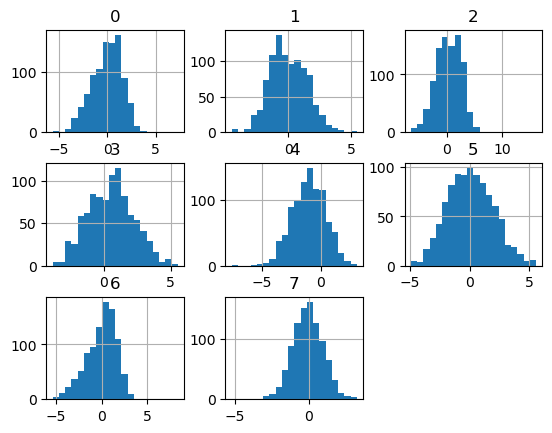

In [24]:
X_hist = X.drop(columns = 'Unnamed: 0')
X_hist.hist(bins = 20)

<Axes: >

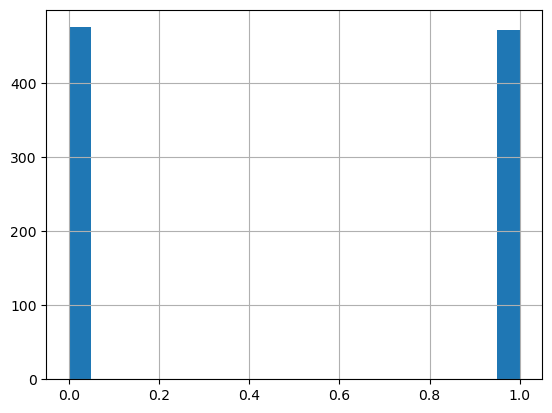

In [25]:
y.drop(columns = 'Unnamed: 0').hist(bins = 20)

In [26]:
#Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 320768)

In [27]:
#Preparing possible values of parameters
criteria = ['gini', 'entropy']
max_depths = [3, 5, 7]
min_samples_leafs = [1, 3, 7]
min_samples_splits = [2, 5]
max_features = [None, 'sqrt', 'log2']
splitters = ['best', 'random']
max_leaf_nodes = [None, 10, 20]
results = []

In [28]:
#Iterating over predefined values of parameters. Calculating AUC values
for criterion in criteria:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            for min_samples_split in min_samples_splits:
                for max_feature in max_features:
                    for splitter in splitters:
                        for max_leaf_node in max_leaf_nodes:
                            Tree = tree.DecisionTreeClassifier(criterion=criterion, 
                                                       max_depth=max_depth, 
                                                       min_samples_leaf=min_samples_leaf,
                                                       min_samples_split=min_samples_split,
                                                       max_features=max_feature,
                                                       splitter=splitter,
                                                        max_leaf_nodes = max_leaf_node,
                                                       random_state=320768)
                            mean_auc = cross_val_score(Tree, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()
                            sd_auc = cross_val_score(Tree, X_train, y_train, cv = 10, scoring = 'roc_auc').std()
                            results.append({
                            'criterion': criterion,
                            'max_depth': max_depth,
                            'min_samples_leaf': min_samples_leaf,
                            'min_samples_split': min_samples_split,
                            'max_features': max_feature,
                            'splitter': splitter,
                            'max_leaf_nodes' : max_leaf_node,
                            'AUC': mean_auc,
                            'Std_auc': sd_auc
                        })
                            

In [29]:
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by='AUC', ascending=False)
print(df_results_sorted)

    criterion  max_depth  min_samples_leaf  min_samples_split max_features  \
361   entropy          3                 3                  2         None   
360   entropy          3                 3                  2         None   
380   entropy          3                 3                  5         None   
379   entropy          3                 3                  5         None   
378   entropy          3                 3                  5         None   
..        ...        ...               ...                ...          ...   
429   entropy          3                 7                  5         log2   
87       gini          3                 7                  2         log2   
411   entropy          3                 7                  2         log2   
105      gini          3                 7                  5         log2   
99       gini          3                 7                  5         sqrt   

    splitter  max_leaf_nodes       AUC   Std_auc  
361     best

In [30]:
#Choosing the best Tree for further evaluation
Tree_best = tree.DecisionTreeClassifier(criterion = "entropy", min_samples_leaf = 3, max_depth = 3, max_leaf_nodes = 10, min_samples_split=2, max_features = None, splitter = 'best', random_state=320768)
scores_best = cross_val_score(Tree_best, X_train, y_train, cv = 10, scoring = 'roc_auc')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_best.mean(), scores_best.std()))

0.94 accuracy with a standard deviation of 0.03
